In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import six

## Power Results

In [157]:
# power_data = np.genfromtxt('result_power.csv', delimiter=',', autostrip=True, skip_header=1, names=True)
power_data = pd.read_csv('result_power.csv')

power_data['Power Consumption'] = power_data['Power Consumption'].apply(lambda x: x / 3.6e+4)
power_data['Completed Cloudlets'] = power_data['Completed Cloudlets'].apply(lambda x: x * 100.0)

# Split by blank rows
split_powers = list()
def split_data(df):
    key = df['No. of Cloudlets'].iloc[0]
    split_powers.append((key, df[0:6].drop('No. of Cloudlets', axis=1).set_index('Algorithm')))
power_data.groupby('No. of Cloudlets').apply(split_data)
split_powers.pop(0)
# print(split_powers)

(5,            Power Consumption  Completed Cloudlets
 Algorithm                                        
 NONE                  0.8675                100.0
 ACO-VMS               0.8675                100.0
 LR                    0.8675                100.0
 MAD                   0.8675                100.0
 BFST                  0.0000                  0.0
 IQR                   0.8675                100.0)

/home/shivanshs9/.virtualenvs/ML/lib/python3.7/site-packages/pandas/plotting/_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


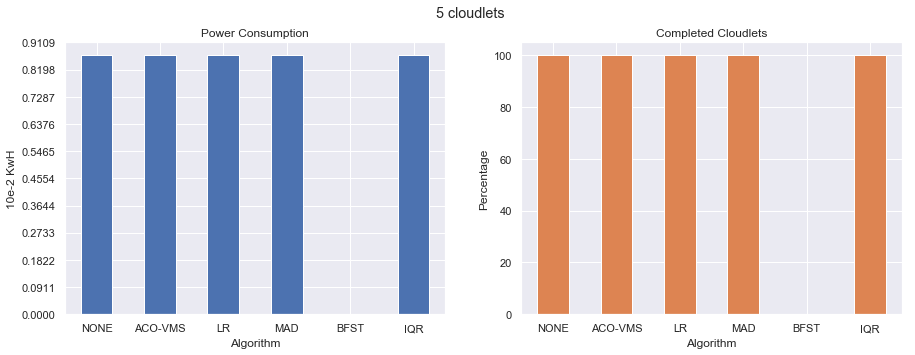

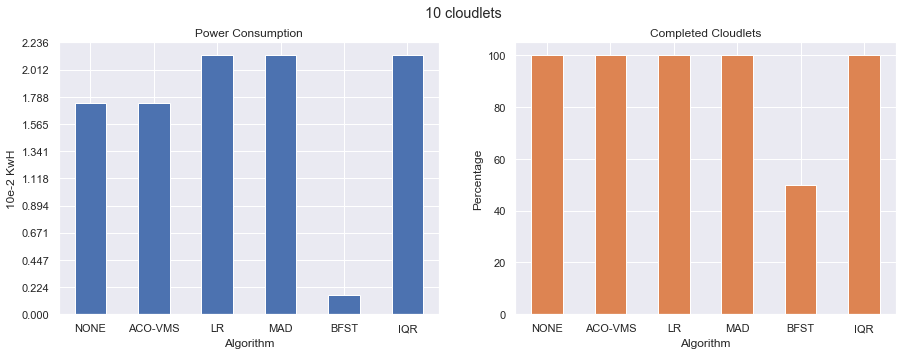

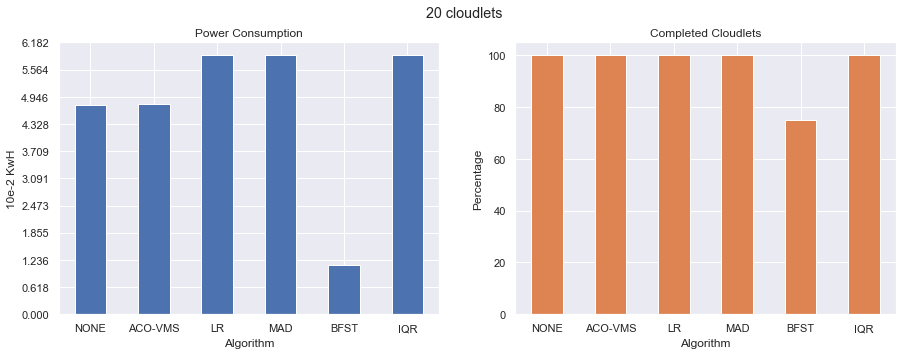

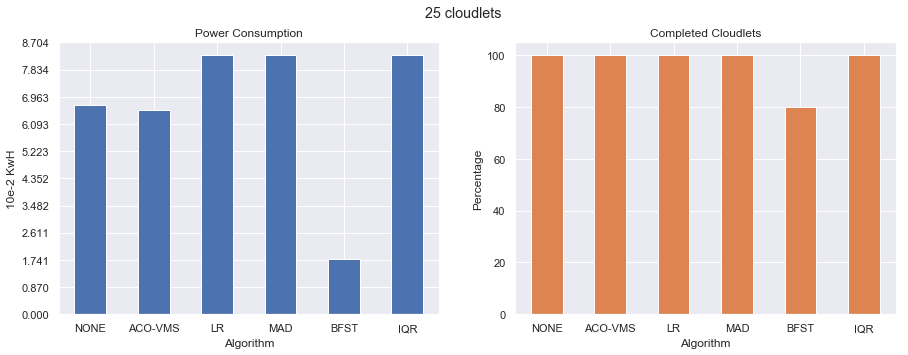

In [158]:
for entry in split_powers:
    title = f'{entry[0]} cloudlets'
    data = entry[1]
    f = plt.figure(figsize=(15,5))
    ax1 = f.add_subplot(121)
    axes = data.plot.bar(ax=ax1, rot=0, layout=(1, 2), title=title, subplots=True, legend=False)
    axes[0][0].set_ylabel('10e-2 KwH')
    b,t = axes[0][0].get_ylim()
    axes[0][0].set_yticks(np.arange(b,t+0.01,(t-b)/10))
    axes[0][1].set_ylabel('Percentage')

## Migration Results

In [159]:
mig_data = pd.read_csv('result_migrations.csv')

# Split by blank rows
split_migs = list()
def split_data(df):
    key = df['No. of Cloudlets'].iloc[0]
    split_migs.append((key, df[0:6].drop('No. of Cloudlets', axis=1).set_index('Algorithm')))
mig_data.groupby('No. of Cloudlets').apply(split_data)
split_migs.pop(0)
# print(split_powers)

(5,            Total VM Migrations  No. of hosts switched to sleep mode
 Algorithm                                                          
 NONE                         0                                    0
 ACO-VMS                      0                                    0
 LR                           0                                    0
 MAD                          0                                    0
 BFST                         0                                    0
 IQR                          0                                    0)

/home/shivanshs9/.virtualenvs/ML/lib/python3.7/site-packages/pandas/plotting/_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


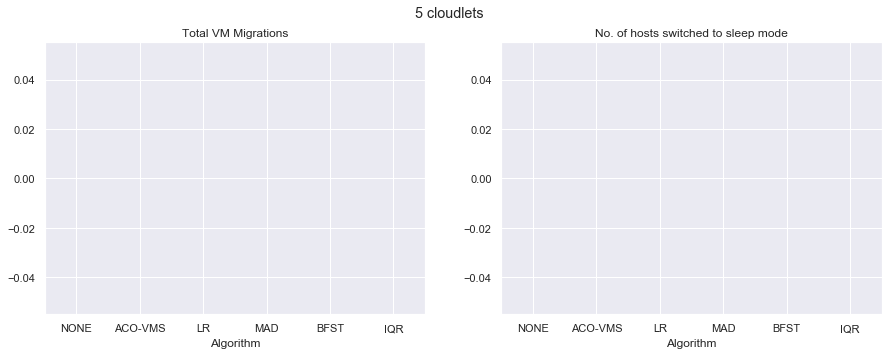

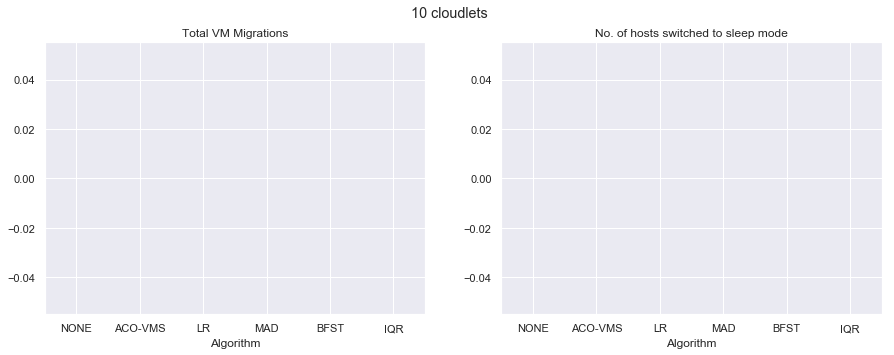

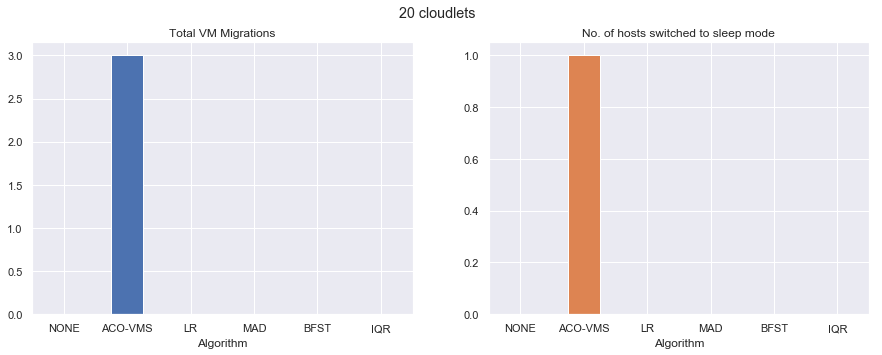

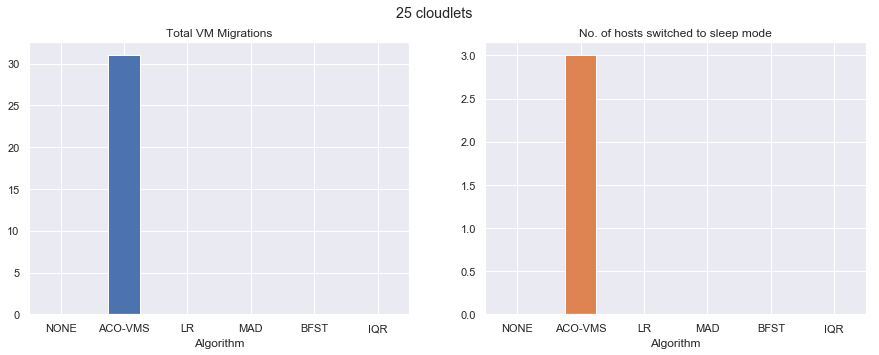

In [163]:
for entry in split_migs:
    title = f'{entry[0]} cloudlets'
    data = entry[1]
    f = plt.figure(figsize=(15,5))
    ax1 = f.add_subplot(121)
    axes = data.plot.bar(ax=ax1, rot=0, layout=(1, 2), title=title, subplots=True, legend=False)
#     axes[0][0].set_ylabel('10e-2 KwH')
#     b,t = axes[0][0].get_ylim()
#     axes[0][0].set_yticks(np.arange(b,t+0.01,(t-b)/10))
#     axes[0][1].set_ylabel('Percentage')

## Server Results

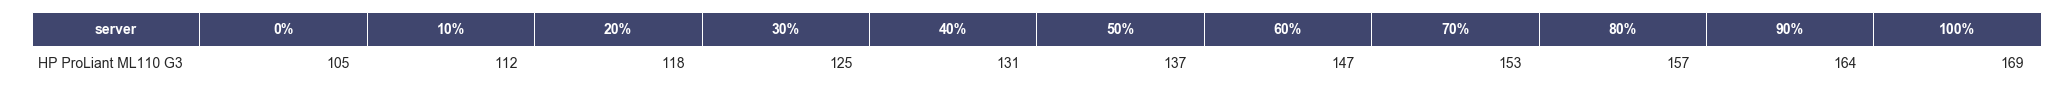

In [180]:
data = pd.DataFrame({
    'server': ['HP ProLiant ML110 G3'],
    '0%': [105],
    '10%': [112],
    '20%': [118],
    '30%': [125],
    '40%': [131],
    '50%': [137],
    '60%': [147],
    '70%': [153],
    '80%': [157],
    '90%': [164],
    '100%': [169]
})

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(data, col_width=3)